<a href="https://colab.research.google.com/github/Indian-otaku/ML_GIT_practice/blob/main/AnalyticsVidayalayaProgNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
submission_data = pd.read_csv("./sample_submission.csv")

In [ ]:
X = train_data.drop(["Loan_ID", "Loan_Status"], axis=1)
y = train_data["Loan_Status"]
X_test = test_data.drop("Loan_ID", axis=1)

In [ ]:
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area",
    "Credit_History",
]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer()
X[num_cols] = knnimp.fit_transform(X[num_cols])
X_test[num_cols] = knnimp.transform(X_test[num_cols])

In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="constant", fill_value="missing")
X[cat_cols] = si.fit_transform(X[cat_cols])
X_test[cat_cols] = si.transform(X_test[cat_cols])

In [ ]:
X["ApplicantIncomeByLoanAmount"] = X["ApplicantIncome"] / X["LoanAmount"]
X["CoapplicantIncomeByLoadAmount"] = X["CoapplicantIncome"] / X["LoanAmount"]
X["LoanAmountByLoanAmountTerm"] = X["LoanAmount"] / X["Loan_Amount_Term"]
X.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1, inplace=True)

X_test["ApplicantIncomeByLoanAmount"] = X_test["ApplicantIncome"] / X_test["LoanAmount"]
X_test["CoapplicantIncomeByLoadAmount"] = X_test["CoapplicantIncome"] / X_test["LoanAmount"]
X_test["LoanAmountByLoanAmountTerm"] = X_test["LoanAmount"] / X_test["Loan_Amount_Term"]
X_test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1, inplace=True)

In [ ]:
X[cat_cols] = X[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first")
X_ohe = pd.DataFrame(
    ohe.fit_transform(X[cat_cols]), 
    index=X.index, 
    columns=ohe.get_feature_names_out()
)
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[cat_cols]),
    index=X_test.index, 
        columns=ohe.get_feature_names_out()
)

In [ ]:
X = X.join(X_ohe)
X_test = X_test.join(X_test_ohe)

X.drop(list(cat_cols), axis=1, inplace=True)
X_test.drop(list(cat_cols), axis=1, inplace=True)

In [ ]:
X.head()

,ApplicantIncomeByLoanAmount,CoapplicantIncomeByLoadAmount,LoanAmountByLoanAmountTerm,Gender_Male,Gender_missing,Married_Yes,Married_missing,Dependents_1,Dependents_2,Dependents_3+,Dependents_missing,Education_Not Graduate,Self_Employed_Yes,Self_Employed_missing,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_missing
0,39.573748,0.00000,0.410556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,35.804688,11.78125,0.355556,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,45.454545,0.00000,0.183333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,21.525000,19.65000,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,42.553191,0.00000,0.391667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y, random_state=39)

In [ ]:
X_train.head()

,ApplicantIncomeByLoanAmount,CoapplicantIncomeByLoadAmount,LoanAmountByLoanAmountTerm,Gender_Male,Gender_missing,Married_Yes,Married_missing,Dependents_1,Dependents_2,Dependents_3+,Dependents_missing,Education_Not Graduate,Self_Employed_Yes,Self_Employed_missing,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_missing
93,33.877049,0.000000,0.338889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
497,41.666667,25.738739,9.250000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
269,31.955556,17.333333,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
40,45.000000,0.000000,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
549,25.318182,18.327273,0.305556,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pd.DataFrame(y).value_counts()

1    422
0    192
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[["ApplicantIncomeByLoanAmount",
         "CoapplicantIncomeByLoadAmount", 
         "LoanAmountByLoanAmountTerm"
         ]] = scaler.fit_transform(
              X_train[["ApplicantIncomeByLoanAmount",
                       "CoapplicantIncomeByLoadAmount", 
                       "LoanAmountByLoanAmountTerm"
                       ]]
         )
X_valid[["ApplicantIncomeByLoanAmount",
         "CoapplicantIncomeByLoadAmount", 
         "LoanAmountByLoanAmountTerm"
         ]] = scaler.transform(
              X_valid[["ApplicantIncomeByLoanAmount",
                       "CoapplicantIncomeByLoadAmount", 
                       "LoanAmountByLoanAmountTerm"
                       ]]
         )

In [ ]:
X_train.sample(10)

,ApplicantIncomeByLoanAmount,CoapplicantIncomeByLoadAmount,LoanAmountByLoanAmountTerm,Gender_Male,Gender_missing,Married_Yes,Married_missing,Dependents_1,Dependents_2,Dependents_3+,Dependents_missing,Education_Not Graduate,Self_Employed_Yes,Self_Employed_missing,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_missing
183,0.390589,0.000000,0.075580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
58,0.132484,0.033248,0.051491,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
348,0.070635,0.047065,0.075279,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
453,0.080129,0.072879,0.051491,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.196097,0.040308,0.031555,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
204,0.092234,0.000000,0.034628,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
29,0.091209,0.046170,0.033424,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
185,0.983885,0.105284,0.033424,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
337,0.039624,0.069518,0.050286,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
578,0.047038,0.055483,0.029509,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
## Using neural network to solve this problem

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_history(history):
    keys = list(history.history.keys())
    n_plots = int(len(keys) / 2)
    for i in range(0, n_plots):
        n_epochs = len(history.history[keys[i]])
        sns.lineplot(
            x=np.arange(1, n_epochs+1),
            y=history.history[keys[i]],
            label="Train data"
        )
        sns.lineplot(
            x=np.arange(1, n_epochs+1),
            y=history.history[keys[n_plots+i]],
            label="Validation data"
        )
        plt.title(keys[i])
        plt.legend()
        plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
X_train.shape

(491, 18)

In [ ]:
model1 = Sequential()

model1.add(layers.Dense(128,
                        activation="relu",
                        kernel_regularizer=keras.regularizers.L1(0.01)))

model1.add(layers.Dense(32, 
                        activation="relu",
                        kernel_regularizer=keras.regularizers.L1(0.01)))

model1.add(layers.Dense(1))

In [ ]:
model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy", "AUC"]
)

In [ ]:
history = model1.fit(X_train, 
           y_train,
           batch_size=64,
           epochs=35,
           verbose=0,
           validation_data=[X_valid, y_valid])

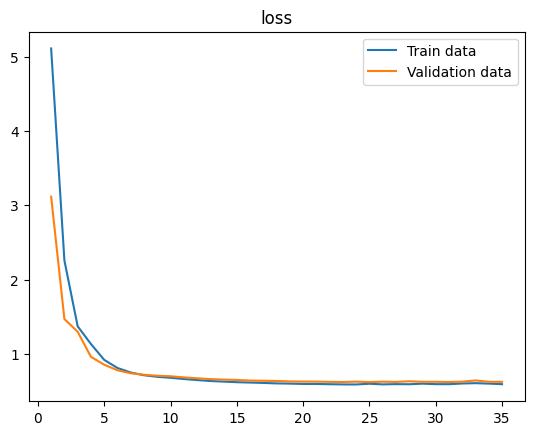

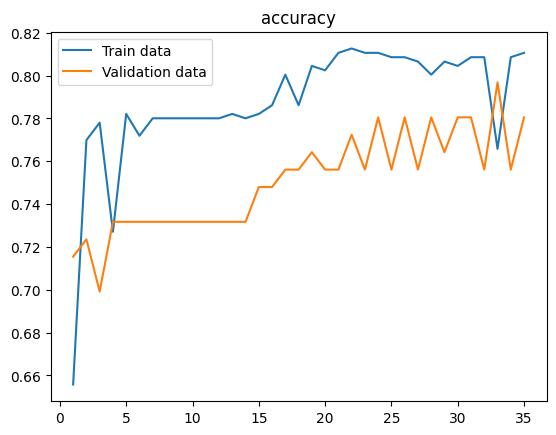

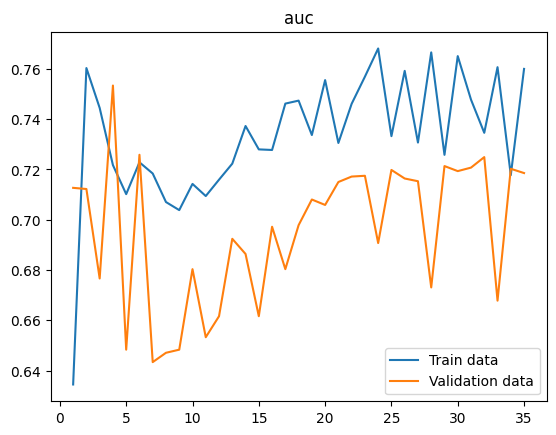

In [ ]:
plot_history(history)

In [ ]:
model1.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.7805 - auc: 0.7186


[0.6235209703445435, 0.7804877758026123, 0.7185758352279663]

In [ ]:
(X_train.shape[0] // 32) * 30

450

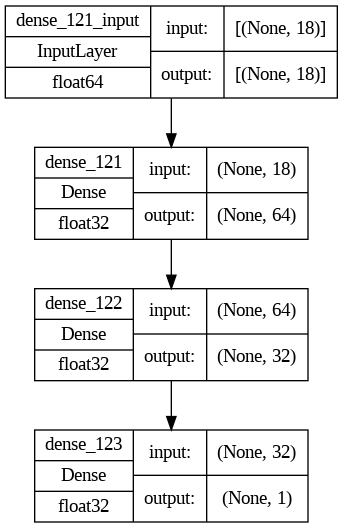

In [ ]:
plot_model(model1, show_shapes=True, show_dtype=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[["ApplicantIncomeByLoanAmount",
         "CoapplicantIncomeByLoadAmount", 
         "LoanAmountByLoanAmountTerm"
         ]] = scaler.fit_transform(
              X[["ApplicantIncomeByLoanAmount",
                       "CoapplicantIncomeByLoadAmount", 
                       "LoanAmountByLoanAmountTerm"
                       ]]
         )
X_test[["ApplicantIncomeByLoanAmount",
         "CoapplicantIncomeByLoadAmount", 
         "LoanAmountByLoanAmountTerm"
         ]] = scaler.transform(
              X_test[["ApplicantIncomeByLoanAmount",
                       "CoapplicantIncomeByLoadAmount", 
                       "LoanAmountByLoanAmountTerm"
                       ]]
         )

In [ ]:
def build_model():
    model = Sequential()
    model.add(layers.Dense(128,
                        activation="relu",
                        kernel_regularizer=keras.regularizers.L1(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, 
                        activation="relu",
                        kernel_regularizer=keras.regularizers.L1(0.01)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=["accuracy", "AUC"]
    )
    return model


In [ ]:
model2 = build_model()
model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy", "AUC"]
)

In [ ]:
history = model2.fit(X, 
           y,
           batch_size=64,
           epochs=35,
           verbose=0)

<Axes: >

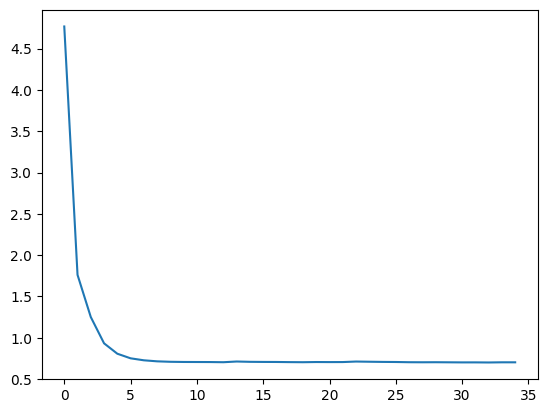

In [ ]:
sns.lineplot(history.history["loss"])

<Axes: >

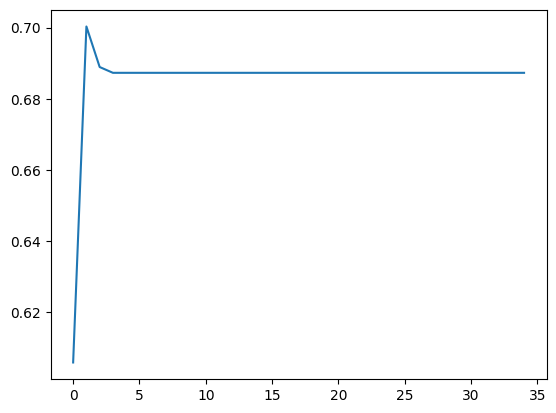

In [ ]:
sns.lineplot(history.history["accuracy"])

In [ ]:
predictions_logits = model.predict(X_test)
predictions_logits = pd.DataFrame(predictions_logits)

12/12 [==============================] - 0s 2ms/step


In [ ]:
def logittolabel(val):
    if val >= 0.5:
        return 1
    else:
        return 0

predictions = predictions_logits[0].map(lambda x: 1 if x>=0.5 else 0)

In [ ]:
predictions

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: 0, Length: 367, dtype: int64

In [ ]:
submission_data["Loan_Status"] = le.inverse_transform(predictions.squeeze())

In [ ]:
submission_data.to_csv("submit.csv", index=False)

In [ ]:
def build_model(activation="elu", 
                learning_rate=0.01, 
                kernel_regularizer=keras.regularizers.L1(0.01)):
    model = Sequential()
    model.add(layers.Dense(128,
                        activation=activation,
                        kernel_regularizer=kernel_regularizer))
    model.add(layers.Dense(32, 
                        activation=activation,
                        kernel_regularizer=kernel_regularizer))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=["accuracy", "AUC"]
    )
    return model

In [ ]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from scipy.stats import reciprocal


# # Wrap the TensorFlow model within a scikit-learn compatible wrapper
# wrapped_model = KerasClassifier(build_fn=build_model)

# # Define the parameter grid for grid search
# param_dist = {
#     'learning_rate': reciprocal(0.001, 0.1),
#     'kernel_regularizer': [keras.regularizers.L1(0.01), 
#                            keras.regularizers.L2(0.01)],
#     'activation': ["relu", "elu"]
# }

# # Perform halving randomized search
# halving_search = HalvingRandomSearchCV(estimator=wrapped_model, 
#                                        param_distributions=param_dist, 
#                                        factor=3, resource='n_samples', 
#                                        max_resources=100, cv=3, 
#                                        scoring='accuracy',
#                                        verbose=0)
# halving_search.fit(X_train, y_train)

# # Access the best model and best hyperparameters
# best_model = halving_search.best_estimator_
# best_params = halving_search.best_params_


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True)

val_loss_list = []
history_list = []
print("\t\t  Loss \t Accuracy AUC")
# Iterate over the folds
for train_index, val_index in kfold.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build and compile your TensorFlow model
    model = build_model()

    # Train the model on the training data
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.1)
    history_list.append(history)

    # Evaluate the model on the validation data
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    val_loss_list.append(val_loss)

    print("Validation loss:", np.round(val_loss, 4))

print("\t \t", np.array(val_loss_list).mean(axis=0))

		  Loss 	 Accuracy AUC
Validation loss: [0.613  0.7642 0.6518]
Validation loss: [0.6894 0.7642 0.659 ]
Validation loss: [0.7002 0.6829 0.5   ]
Validation loss: [0.688  0.7724 0.7016]
Validation loss: [0.5622 0.8361 0.8506]
	 	 [0.6505568  0.76396108 0.67260814]


In [ ]:
model = build_model()
model.fit(X, y, epochs=30, batch_size=32, verbose=0)

In [ ]:
0.60326581 0.78997735 0.72310948 30
0.60075489 0.79634813 0.72717249 50
